## Getting Started
### Importar *Packages* e *Libraries* necessários 

Inicialmente, deve sempre ser feita toda a parte dos *imports* dos várias *packages* e *libraries* necessárias para o projeto em si.

In [1]:
import pandas as pd
import numpy as np
import urllib.request 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.display import Image
from osgeo import ogr
from qgis import processing
from qgis.core import *
from qgis.gui import *
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/share/qgis/python')
QgsApplication.setPrefixPath("/usr/", True)

## Importar *Datasets*
### Ler ficheiros CSV

Nesta secção são obtidos todos os *datasets* em modo CSV.

In [53]:
# Datasets COVID-19 Mundial
covid19LocalizacoesM = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/locations.csv")
covid19CasosM = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases.csv")
covid19MortesM = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths.csv")
covid19RecuperadosM = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

# Daset COVID-19 Portugal
covid19PT1 = pd.read_csv("https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv")
covid19PT2 = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv")
covid19PTConcelho = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/confirmados_concelho.csv")
covid19PTDistrito = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/confirmados_distrito_ilha.csv")

# Dataset Reservas Aéreas União Europeia
reservasUE = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosReservasAereasUE.csv")

# Dataset Reservas Aéreas Portugal
reservasPT = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosReservasAereasPT.csv")

# Dataset Apoios por Região a Microempresas Turismo Portugal
turismoRegiaoPT = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosApoioTurismoRegiaoPT.csv")

# Dataset Apoios por Tipologia a Microempresas Turismo Portugal
turismoTipologiaPT = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosApoioTurismoTipologiaPT.csv")

## Estudo dos Dados
### Dados Mundias

#### 1. Panorma Geral da Pandemia

Para criar todo um panorama geral da evolução da pandemia em termos geográficos ao redor do mundo, fez-se uso do QGIS de modo a obter os seguintes mapas:
- Mapa que demonstra o aumento catastrófico de casos confirmados. Para gerar o GIF deste mapa, fez-se uso do *plugin* **Time Manager**;
- Mapa que detalha o nível de gravidade para cada país (através das variações de cor). Note-se que quanto mais escura a cor está, mais número de casos esse país apresenta.

Com estes mapas desenhados, devolve-se a lista de todos os países e faz-se a sua contagem.

In [4]:
def criarMapaMundialPaisesAfetados(layer):

    xt = layer.extent()
    width  = 1000
    height = 500

    options = QgsMapSettings()
    options.setLayers([layer])
    options.setBackgroundColor(QColor(255, 255, 255))
    options.setOutputSize(QSize(width, height))
    options.setExtent(xt)
              
    render = QgsMapRendererParallelJob(options)
    render.start()
    render.waitForFinished()

    image = render.renderedImage()
    return image

Layer 30Abril loaded
Layer layer_styles loaded


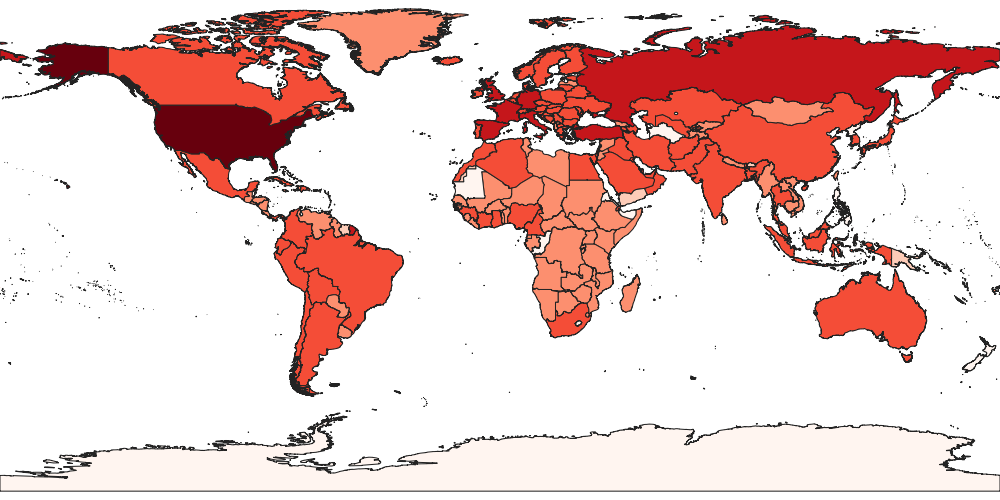

In [5]:
mapaMundialPaisesAfetados = "Conjunto de Dados/Mapas GKPG/MapaMundialPaisesAfetados.gpkg"
conn = ogr.Open(mapaMundialPaisesAfetados)

for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(mapaMundialPaisesAfetados, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

finalAbril = QgsProject.instance().mapLayersByName('30Abril')[0]
image = criarMapaMundialPaisesAfetados(finalAbril)

imgbuf = QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save(imgbuf,"PNG")
Image(imgbuf.data())

In [6]:
countries = covid19LocalizacoesM['location'].unique().tolist()

print(countries)
print("\n")
print("Quantidade Países Afetados COVID-19 (Até à Data Atual do Notebook): %s" %len(countries))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'International', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Swaziland', 'Ethiopia', 'Falkland Islands', 'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 

#### 2. Lista de Casos de COVID-19

Esta secção detalha a nível numérico o total de casos em todo o mundo, fazendo a distinção entre Mortos e Recuperados.

In [7]:
print("Total Casos COVID-19 Mundial (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19CasosM['World'].iloc[-1]))
print("Total Mortes COVID-19 Mundial (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19MortesM['World'].iloc[-1]))
print("Total Recuperados COVID-19 Mundial (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19RecuperadosM.iloc[:,-1].sum()))

Total Casos COVID-19 Mundial (Até à Data Atual do Notebook): 3,307,600
Total Mortes COVID-19 Mundial (Até à Data Atual do Notebook): 238,431
Total Recuperados COVID-19 Mundial (Até à Data Atual do Notebook): 1,052,415


#### 3. Evolução da Pandemia

Através de um conjunto de três gráficos, consegue-se obter uma ideia mais precisa de como a pandemia está a evoluir ao longo do tempo:
- *Linear Graph* que mostra a evolução do Total Casos;
- *Linear Graph* que mostra a evolução do Total Mortes;
- *Linear Graph* que relaciona as duas métricas e disponibiliza assim uma comparação instantânea entre as mesmas.

**Note-se que estes gráficos são desenhados numa escala linear. Os dados são referentes ao período de 31/12/2019 até à Data Atual.**

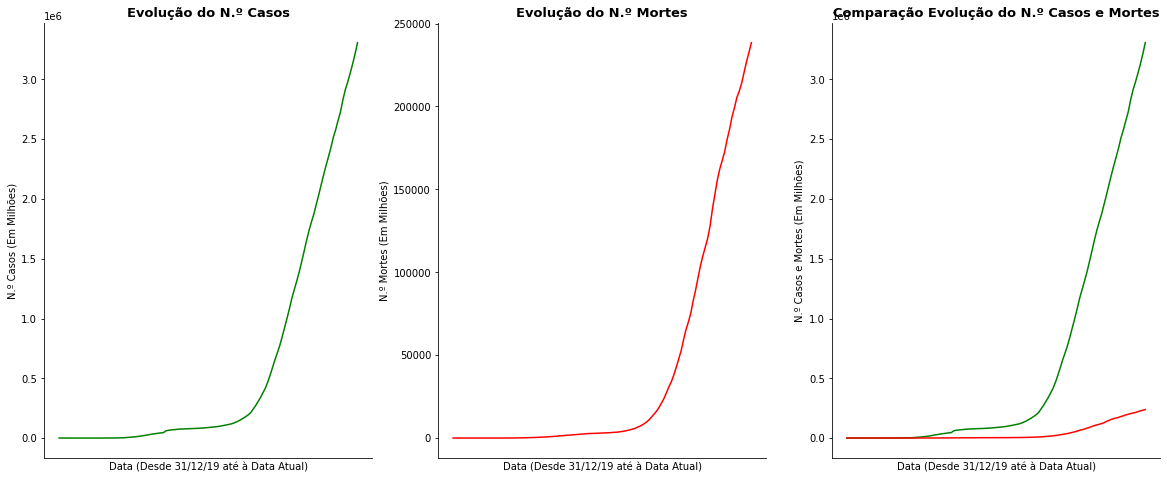

In [8]:
totalCasosMundial = covid19CasosM.sort_values(by=['date'])
x1 = totalCasosMundial.date
y1 = totalCasosMundial.World

totalMortesMundial = covid19MortesM.sort_values(by=['date'])
x2 = totalMortesMundial.date
y2 = totalMortesMundial.World

plt.figure(figsize=(20,20)).subplots_adjust(hspace=.5)

ax1 = plt.subplot(2,3,1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xticks([])
plt.title('Evolução do N.º Casos', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.xlabel('Data' + ' (Desde 31/12/19 até à Data Atual)')
plt.ylabel('N.º Casos' + ' (Em Milhões)')
plt.plot(x1,y1, color='green')


ax2 = plt.subplot(2,3,2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.xticks([])
plt.title('Evolução do N.º Mortes', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.xlabel('Data' + ' (Desde 31/12/19 até à Data Atual)')
plt.ylabel('N.º Mortes' + ' (Em Milhões)')
plt.plot(x2,y2, color='red')

ax3 = plt.subplot(2,3,3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.xticks([])
plt.title('Comparação Evolução do N.º Casos e Mortes', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.xlabel('Data' + ' (Desde 31/12/19 até à Data Atual)')
plt.ylabel('N.º Casos e Mortes' + ' (Em Milhões)')
plt.plot(x1,y1, color='green')
plt.plot(x2,y2, color='red')
plt.show()

### Dados Portugal

#### 1. Panorma Geral da Pandemia

Dado que existiu uma contextualização geográfica em termos mundais, faz sentido redirecionar numa segunda fase toda a atenção em torno de Portugal. Para criar um ambiente mais preciso e basilar, fez-se um estudo 100% gráfico, dado que dessa forma capta-se melhor todos os valores em causa.

Tendo em conta a distribuição geográfico de Portugal, comeca-se por criar o seguinte *Pie Graph*:
- *Bar Graph* que detalha o número de casos confirmados para cada distrito português;

In [115]:

plt.figure(figsize = (20,20))

ax2 = plt.subplot(2,2,2)
ax2.axes.get_xaxis().set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
x1 = covid19PTDistrito['distrito/ilha']
y1 = covid19PTDistrito.sum(axis = 1)
plt.barh(x1, y1, color = "#002c46")


for i, v in enumerate(y1):
    ax2.text(v , i , str("  {:,}".format(v)))

plt.title("Valor Pago às Microempresas por Tipologia", fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.show()

KeyError: 0      29936.0
1        618.0
2      28221.0
3       3316.0
4        100.0
5       9709.0
6        625.0
7       5293.0
8       1994.0
9       2978.0
10     49561.0
11        89.0
12    107846.0
13      3885.0
14     11348.0
15      4240.0
16      4284.0
17      5525.0
18      1083.0
19       133.0
20        41.0
21        89.0
22       208.0
23        44.0
24       250.0
25       216.0
26       187.0
27        48.0
28        49.0
dtype: float64

#### 2. Lista de Casos de COVID-19

Esta secção detalha a nível numérico o total de casos em Portugal, fazendo a distinção entre Mortos e Recuperados.

In [11]:
print("Total Casos COVID-19 Portugal (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19PT1['confirmados'].iloc[-1]))
print("Total Mortes COVID-19 Portugal (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19PT1['obitos'].iloc[-1]))
print("Total Recuperados COVID-19 Portugal (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19PT1['recuperados'].iloc[-1]))

Total Casos COVID-19 Portugal (Até à Data Atual do Notebook): 25,190
Total Mortes COVID-19 Portugal (Até à Data Atual do Notebook): 1,023
Total Recuperados COVID-19 Portugal (Até à Data Atual do Notebook): 1,671


#### 3. Evolução da Pandemia

Como interessa estudar mais promenorizadamente os dados portugueses, opta-se então pelos *Bar Graphs*, que possibilitam uma visão exato dos valores diários:
- *Bar Graph* que individualiza o número de novos casos diários para Portugal;
- *Bar Graph* que individualiza o número de novas mortes diárias para Portugal;
- *Linear Graph* que diferiencia o número de casos ativos, casos recuperados e mortes diárias.

**Note-se que os dados são referentes ao período de 31/12/2019 até à Data Atual para o número de novos casos e novas mortes.**

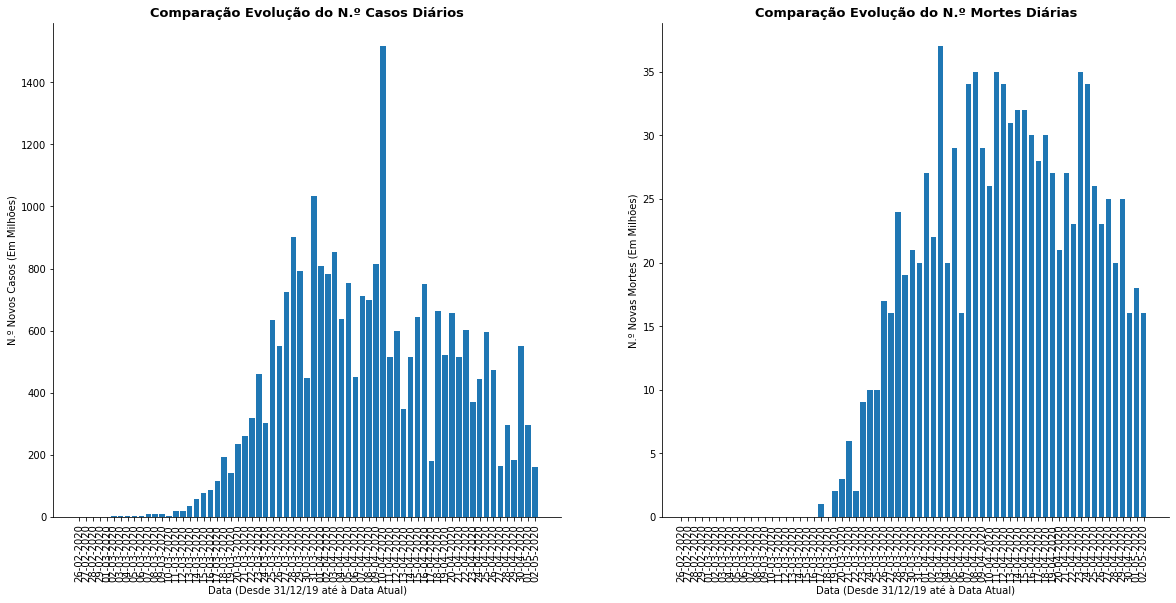

In [34]:
tickLabel = covid19PT1['data']

plt.figure(figsize = (20,20))

x1 = np.arange(len(covid19PT1))
y1 = abs(covid19PT1['confirmados_novos'])

ax1 = plt.subplot(2,2,1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xticks(rotation = 90)
plt.title('Comparação Evolução do N.º Casos Diários', fontdict = {'fontsize': 13, 'fontweight': 'bold'})
plt.xlabel('Data' + ' (Desde 31/12/19 até à Data Atual)')
plt.ylabel('N.º Novos Casos' + ' (Em Milhões)')
plt.bar(x1, y1, tick_label = tickLabel)

x2 = np.arange(len(covid19PT1))
y2 = abs(covid19PT1['obitos'].shift(1) - covid19PT1['obitos'])

ax2 = plt.subplot(2,2,2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.xticks(rotation = 90)
plt.title('Comparação Evolução do N.º Mortes Diárias', fontdict = {'fontsize': 13, 'fontweight': 'bold'})
plt.xlabel('Data' + ' (Desde 31/12/19 até à Data Atual)')
plt.ylabel('N.º Novas Mortes' + ' (Em Milhões)')
plt.bar(x2, y2, tick_label = tickLabel)
plt.show()

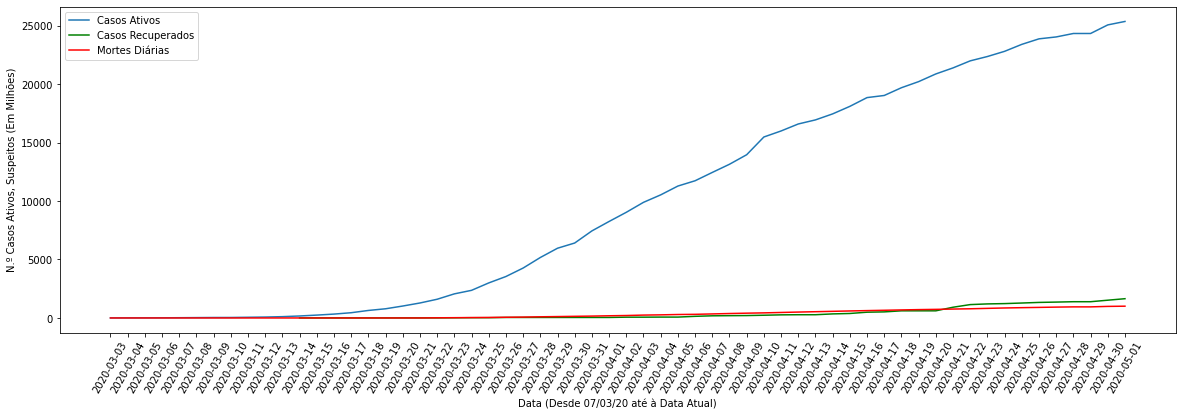

In [32]:
covid19Portugal = covid19PT2.sort_values(by=['data_relatorio'])

x = covid19Portugal.data_relatorio
y = covid19Portugal.confirmados
z = covid19Portugal.recuperados
a = covid19Portugal.obitos

plt.figure(figsize=(20,6))
plt.plot(x, y, label= "Casos Ativos")
plt.plot(x, z, label = "Casos Recuperados", color = "green")
plt.plot(x, a, label = "Mortes Diárias", color = "red")

plt.xticks(rotation = 60)
plt.xlabel('Data' + ' (Desde 07/03/20 até à Data Atual)')
plt.ylabel('N.º Casos Ativos, Suspeitos' + ' (Em Milhões)')


plt.legend(loc="best")
plt.show()

### Dados Turismo Portugal

#### 1. Estudo do Impacto do COVID-19 nas Reservas de Voos

Este estudo serve para analisar/estudar o impacto do vírus COVID-19 sobre as reservas de voos efetuadas em agências de viagens para a União Europeia e Portugal. Para fazer a comparação entre os dois, criam-se os seguintes gráficos:
- *Linear Graph* que demonstra a Variação de Reservas de Voos na União Europeia;
- *Linear Graph* que demonstra a Variação de Reservas de Voos em Portugal;

**Note-se que os dados foram obtidos pela plataforma oficial do Turismo de Portugal e são referentes ao período de 05/01/2020 até à Data Atual.**

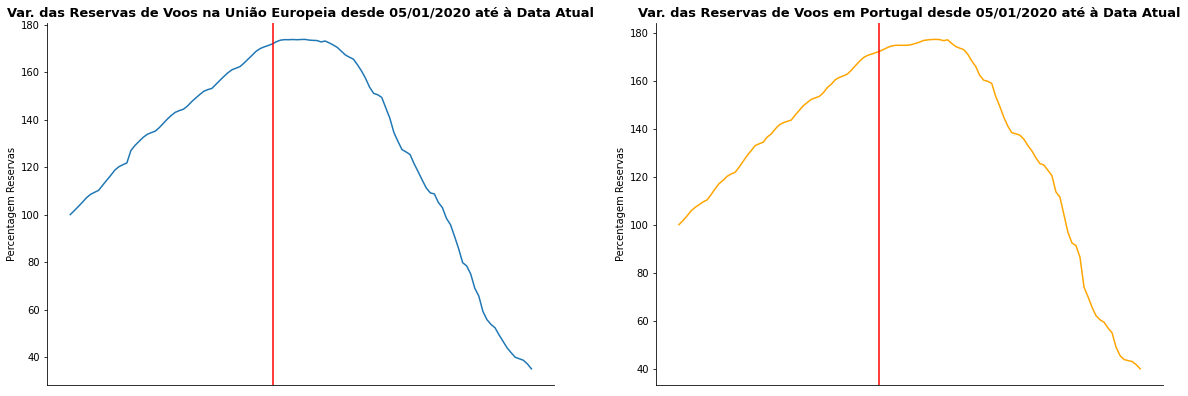

In [33]:
plt.figure(figsize=(20,20)).subplots_adjust(hspace=1)

import datetime as dt

ax1 = plt.subplot(2,2,1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
x1 = np.arange(len(reservasUE))
y1 = reservasUE['Reservas']
plt.plot(x1, y1)
plt.axvline(x=50, color = 'red')
plt.title('Var. das Reservas de Voos na União Europeia desde 05/01/2020 até à Data Atual', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Percentagem Reservas')

ax2 = plt.subplot(2,2,2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
x2 = np.arange(len(reservasPT))
y2 = reservasPT['Reservas']
plt.plot(x2, y2, color = "orange")
plt.axvline(x=50, color = 'red')
plt.title('Var. das Reservas de Voos em Portugal desde 05/01/2020 até à Data Atual', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Percentagem Reservas')
plt.show()

#### 2. Estudo das Candidaturas à Linha de Apoio à Tesouraria de Microempresas ligadas ao Turismo

Este estudo serve para analisar/estudar o impacto do vírus COVID-19 sobre a quantidade de apoio fornecida a microempresas. Neste caso, estuda-se a quantidade de apoio distribuída por Regiões e Tipologia, desenhando-se assim:
- *Pie Graph* que detalha o valor em € de apoio recebido por cada Região;
- *Bar Graph* que identifica o valor em € de apoio fornecido consoante a Tipologia Turística;

**Note-se que os dados foram obtidos pela plataforma oficial do Turismo de Portugal e são referentes ao período de 05/01/2020 até à Data Atual.**

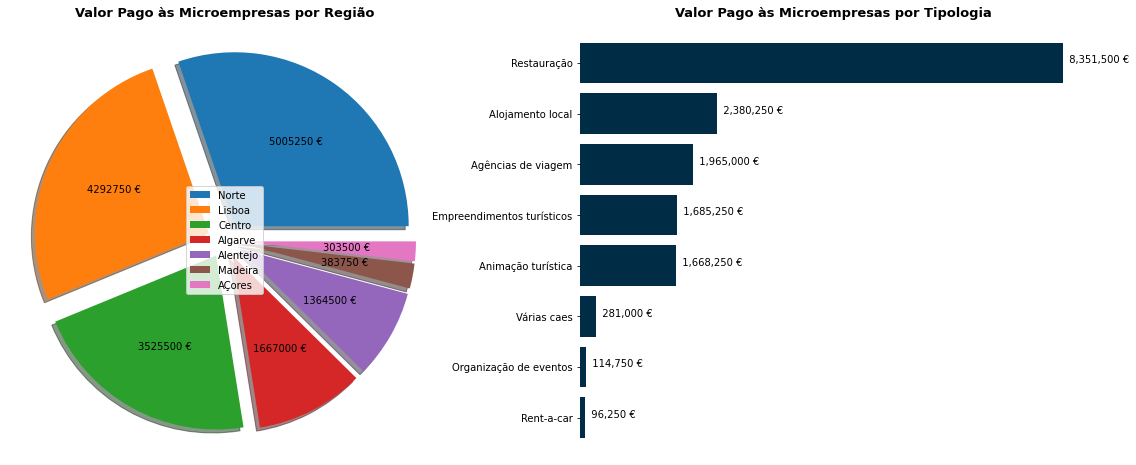

In [51]:
plt.figure(figsize=(20,20)).subplots_adjust(hspace=.5)

def autopctFormat(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        val2 = '{:,}'.format
        return ('{v:d}'.format(v=val) + " €")
    return my_format

ax1 = plt.subplot(2,2,1)
explode = turismoRegiaoPT['Valor Pago'].apply(lambda x:x > 100)
explode = explode.apply(lambda x:0.1 if x == True else 0)
plt.pie(turismoRegiaoPT['Valor Pago'], explode=explode, autopct = autopctFormat(turismoRegiaoPT['Valor Pago']), shadow=True)
plt.legend(turismoRegiaoPT['Região'], loc = "center")
plt.title("Valor Pago às Microempresas por Região", fontdict={'fontsize': 13, 'fontweight': 'bold'})

tipologia = turismoTipologiaPT.sort_values(by=['Valor Pago'], ascending=True)
ax2 = plt.subplot(2,2,2)
ax2.axes.get_xaxis().set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
x1 = tipologia['Tipologia']
y1 = tipologia['Valor Pago']
plt.barh(x1, y1, color = "#002c46")

for i, v in enumerate(y1):
    ax2.text(v , i , str("  {:,}".format(v) + " €"))

plt.title("Valor Pago às Microempresas por Tipologia", fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.show()